# Mathematical model of the curtain

## Model parameters
- $a$: The height of the curtain, $\in [3,7]$m
- $b$: The width of the curtain, $\in [4,8]$m
- $c$: The thickness of the curtain, $\in [0.5, 2]$mm
- $\rho = 1300$ kg/(m^3): Density of PVC
- $r_r$: The radius of the core of the roll
- $m_r$: The mass of the core, assumed to be a thin-walled tube.
- $m_{w}$: Mass of the weights in the bottom of the curtain which keep it stretched

## Signals
- $y$: Output signal. The height of the opening. $a \in [0, a)$ and $a-y$ is the amount of hanging curtain.
- $\theta$: The angle of the roller axis. This has a static relationship with $y$ derived below.
- $u$: Input signal. The torque acting on the roller axis. 

## Kinematic relationships
### The radius of the roll as a function of the opening $y$
We assume a circular shape of the cross-section. The area of this is $A=\pi r^2$, which must equal the sum of the area of the core $A_c = \pi r_r^2$ and the area of the rolled up curtain $A_c = cy$. So,
$$r = \sqrt{r_r^2 + \frac{c}{\pi}y}, \quad \text{and}$$
$$ y = \frac{\pi}{c}(r^2 - r_r^2).$$
### Relationship between $y$ and $\theta$
Start with the relationship between the velocities
$$ r(y)\frac{d\theta}{dt} = \frac{dy}{dt},$$
which gives
$$ \frac{dy}{r(y)} = d\theta$$
$$ \frac{1}{\sqrt{r_r^2 + \frac{c}{\pi}y}} dy = d\theta.$$
Integrate both sides to obtain
$$ \frac{2\pi}{c}\sqrt{r_r^2 + \frac{c}{\pi} y} = \theta + K. $$
We need an initial condition between $y$ and $\theta$ to determine the constant $K$. 
Let $y=0$ imply $\theta = 0$, hence
$$ K = \frac{2\pi}{c}r_r.$$
To find $y$ as a function of $\theta$:
$$ r_r^2 + \frac{c}{\pi}y = (\frac{c}{2\pi} \theta + r_r)^2$$
$$ r_r^2 + \frac{c}{\pi}y = (\frac{c}{2\pi})^2 \theta^2  + \frac{cr_r}{\pi}\theta + r_r^2$$
$$ \frac{c}{\pi}y = (\frac{c}{2\pi})^2 \theta^2  + \frac{cr_r}{\pi}\theta$$
$$ y = \frac{c}{4\pi}\theta^2 + r_r \theta = \theta(\frac{c}{4\pi}\theta + r_r).$$

## Inertial properties
### Mass of the hanging curtain and rolled-up curtain
The hanging curtain has mass
$$m_c = m_w + \rho b c (a-y),$$
and the rolled up part
$$m_{rc} = \rho b c y.$$
### Moment of inertia of the rolled-up and hanging curtain
The moment of inertia of the core is
$$I_r = m_rr_r^2, $$
the moment of inertia of the rolled-up portion of the curtain is 
$$I_{rc}(y) = \frac{1}{2} m_{rc}(r^2 - r_r^2) = \frac{\rho b c^2}{\pi}y^2, $$ and the hanging mass, considering it to be a point mass at distance $r(y)$ from the axis of the roller is
$$I_c(y) = m_c r(y)^2 = (m_w + \rho b c (a-y))(r_r^2 + \frac{c}{\pi}y). $$ 
The complete moment of inertia with respect to the axis of the roller is
$$I(y) = I_r + I_{cr}(y) + I_c(y).$$

## Friction
We consider two types of friction. A friction in the bearings of the roller, and a friction between the curtain and the rails it travels in. The friction moment in the roller bearings is 
$$ F_{r} = f_r \frac{d \theta}{dt}.$$
The friction in the curtain will be proportional to both the velocity $\frac{dy}{dt}$ and the length of hanging curtain $a-y$:
$$F_c = f_c (a-y) \frac{d y}{dt}.$$

## ODE
$$I(y) \ddot{\theta} = -m_c(y)r(y)g - f_r\dot{\theta}-f_c(a-y)\dot{y} + u.$$

In [7]:
import sympy as sy
sy.init_printing()

In [10]:
a,b,c,rr,rho,m_r,m_w = sy.symbols('a b c r_r rho m_r m_w')
y,u,theta,r = sy.symbols('y u theta r')

In [17]:
At = sy.pi*r**2
Ar = sy.pi*rr**2
Ac = y*c
eq1 = At - Ar -Ac
eq1

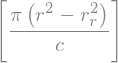

In [18]:
sy.solve(eq1, y)

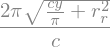

In [20]:
sy.integrate(1/sy.sqrt(rr**2 + c/sy.pi*y), y)